In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Collecting and reading the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\CO2_emission.csv')

In [4]:
df

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


Model_Year: Year of the vehicle model.

Make: Manufacturer of the vehicle.

Model: Specific model of the vehicle.

Vehicle_Class: Classification of the vehicle (e.g., Compact, SUV).

Engine_Size: Size of the vehicle's engine in liters.

Cylinders: Number of engine cylinders.

Transmission: Type of transmission (e.g., AM8, AS10).

Fuel_Consumption_in_City(L/100 km): Fuel consumption in the city.

Fuel_Consumption_in_City_Hwy(L/100 km): Fuel consumption on highways.

Fuel_Consumption_comb(L/100km): Combined fuel consumption.

CO2_Emissions: Target variable for the model, indicating CO2 emissions in grams per km.

Smog_Level: Indicator of smog level produced by the vehicle.

## Let's start the EDA

In [7]:
df.isnull().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [8]:
df1 = df.copy()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [10]:
df1.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [11]:
df1.describe(include='object')

,Make,Model,Vehicle_Class,Transmission
count,935,935,935,935
unique,38,703,15,23
top,Ford,Silverado 4WD,SUV: Small,AS8
freq,87,7,192,206


#### Dropping unnecessary column

In [13]:
df1.drop(columns = ['Model_Year'],axis=1,inplace=True)

#### Checking for outliers

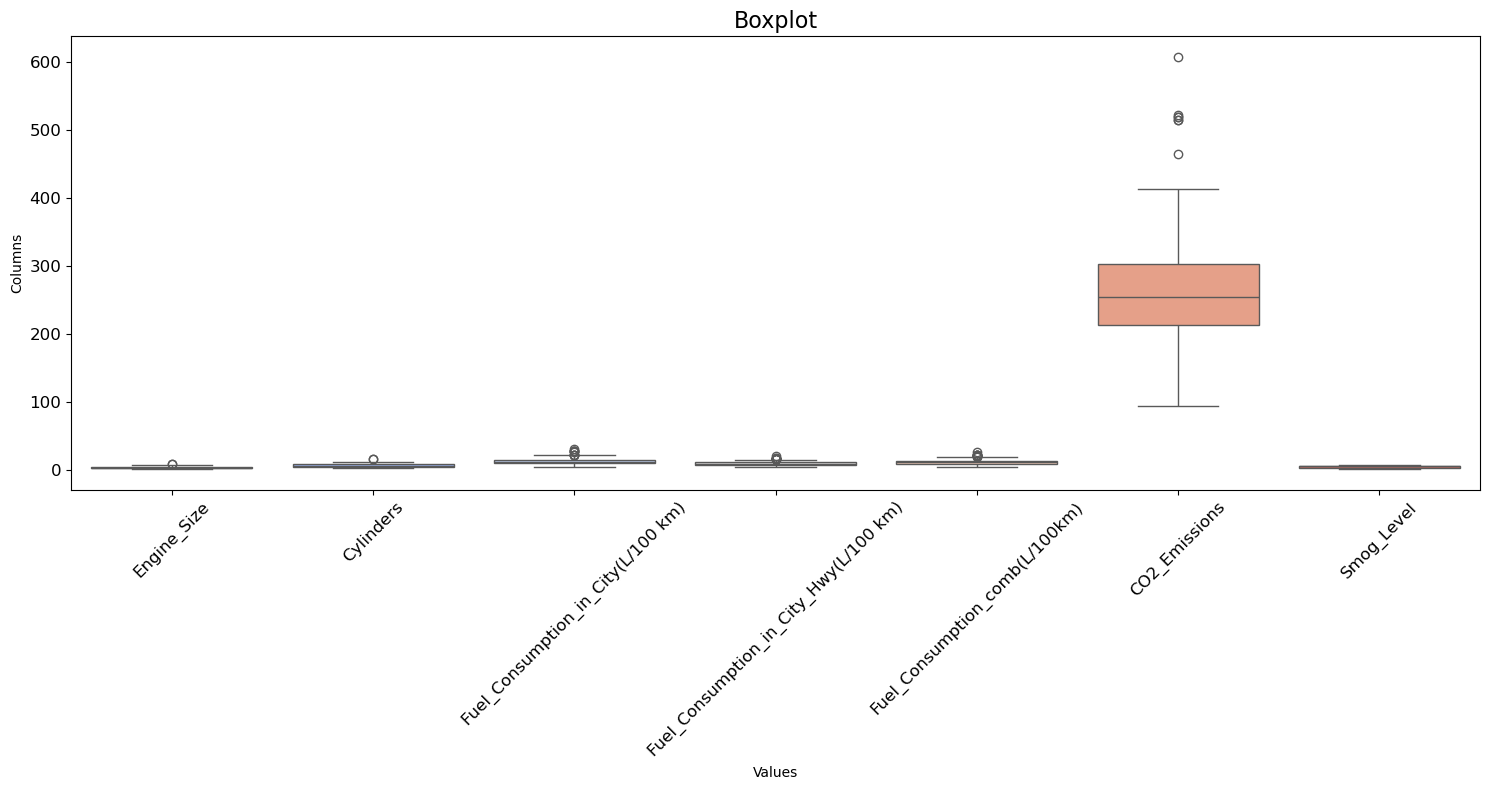

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8)) 
sns.boxplot(data=df1, palette="coolwarm")  # Horizontal boxplot
plt.title("Boxplot", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Columns")
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.tight_layout()
plt.show()

#### Treatment for outliers

In [17]:
for col in df1.select_dtypes(include = ["int", "float64"]).columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_limit) & (df1[col] <= upper_limit)]

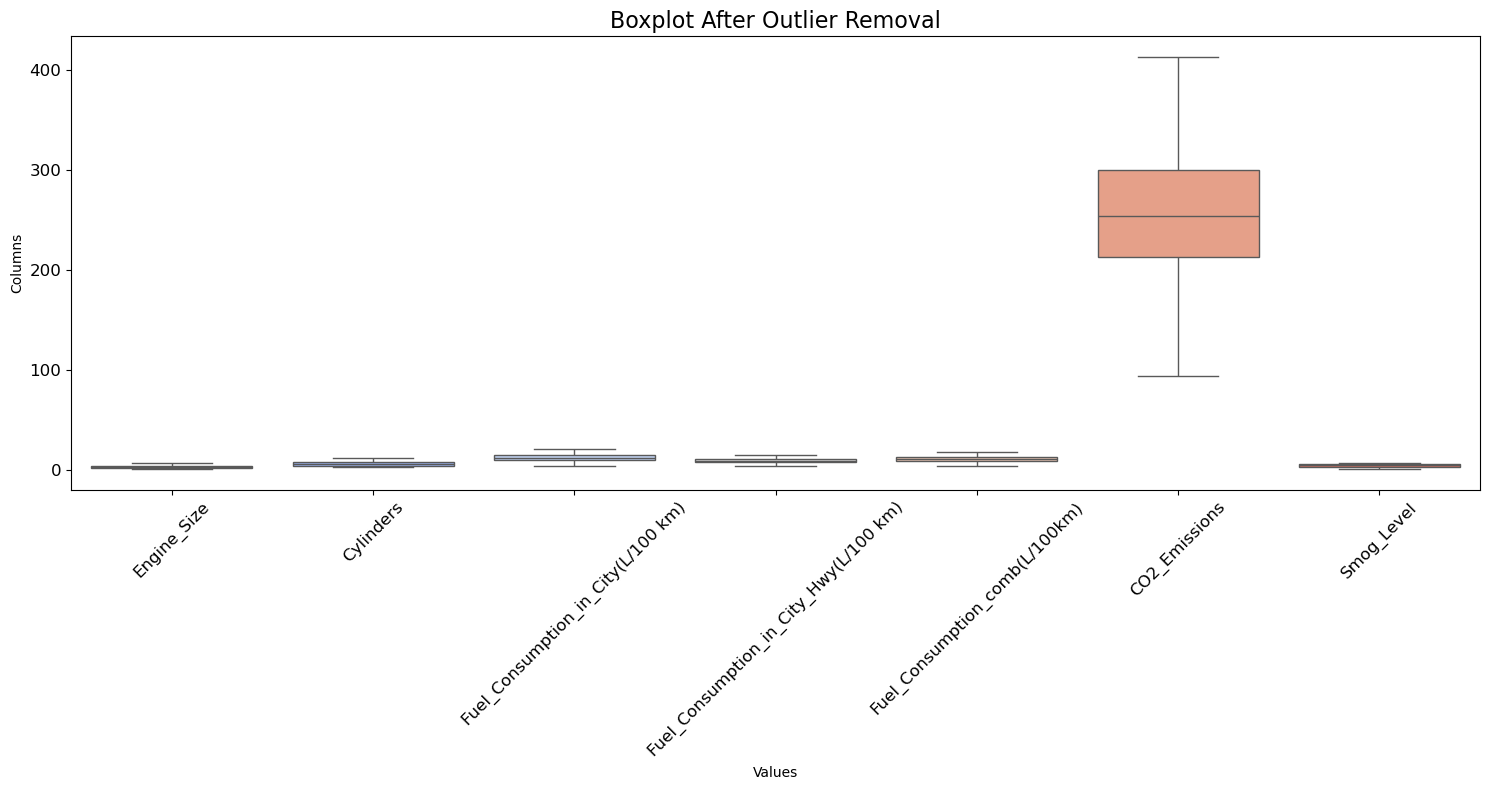

In [18]:
plt.figure(figsize=(15, 8)) 
sns.boxplot(data=df1, palette="coolwarm")  # Horizontal boxplot
plt.title("Boxplot After Outlier Removal", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Columns")
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.tight_layout()
plt.show()

In [19]:
df1.shape

(921, 11)

#### Separating Numerical and Categorical Columns and performing Data Visualization

In [21]:
num = df1.select_dtypes(exclude='object')
cat = df1.select_dtypes(include='object')

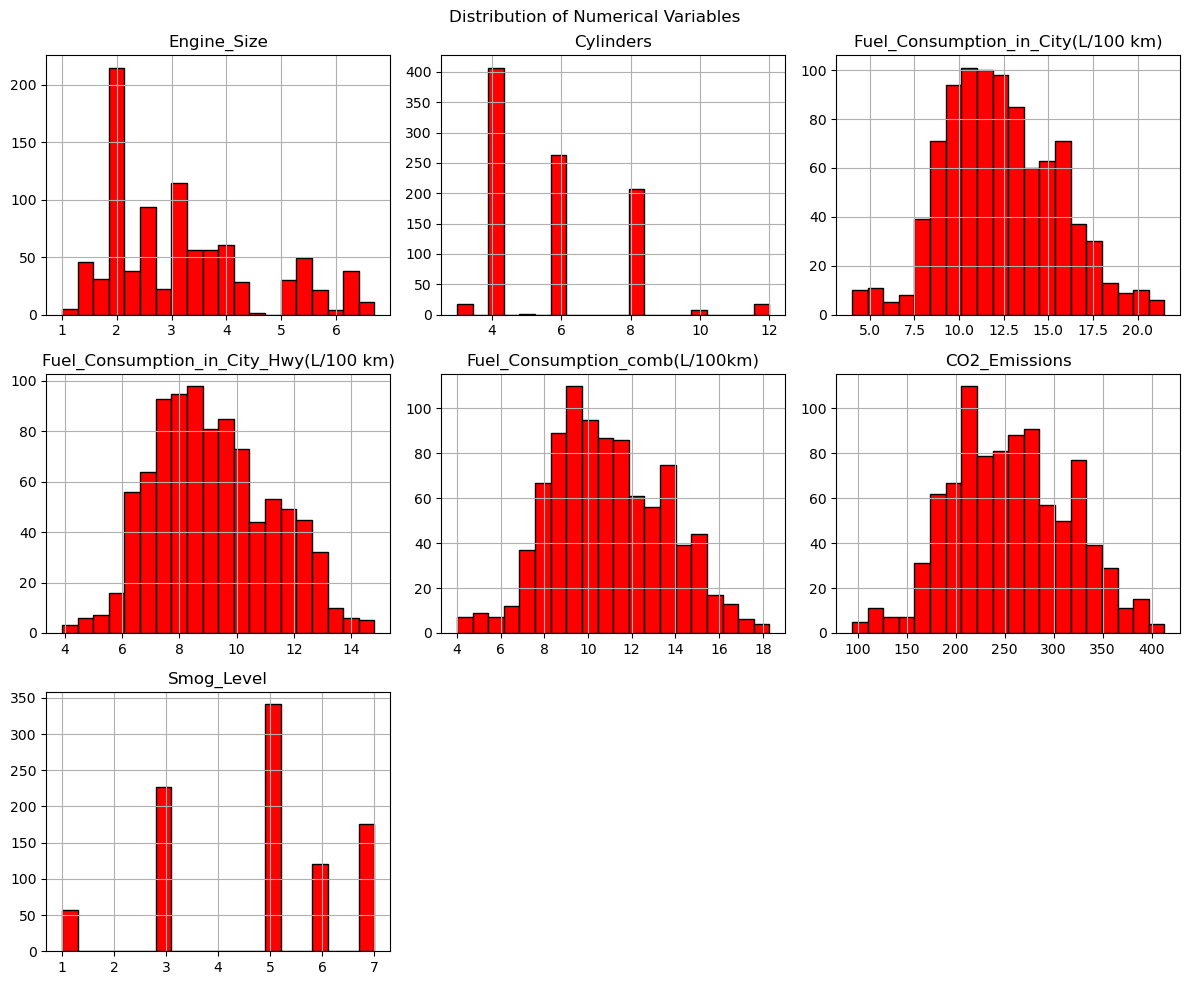

In [22]:
import matplotlib.pyplot as plt
num.hist(figsize=(12,10),bins=20,color='red',edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

We can see that some features have skewness. So lets reduce it

In [24]:
num.skew()

Engine_Size                               0.862426
Cylinders                                 0.908676
Fuel_Consumption_in_City(L/100 km)        0.211605
Fuel_Consumption_in_City_Hwy(L/100 km)    0.286242
Fuel_Consumption_comb(L/100km)            0.189060
CO2_Emissions                             0.095462
Smog_Level                               -0.493896
dtype: float64

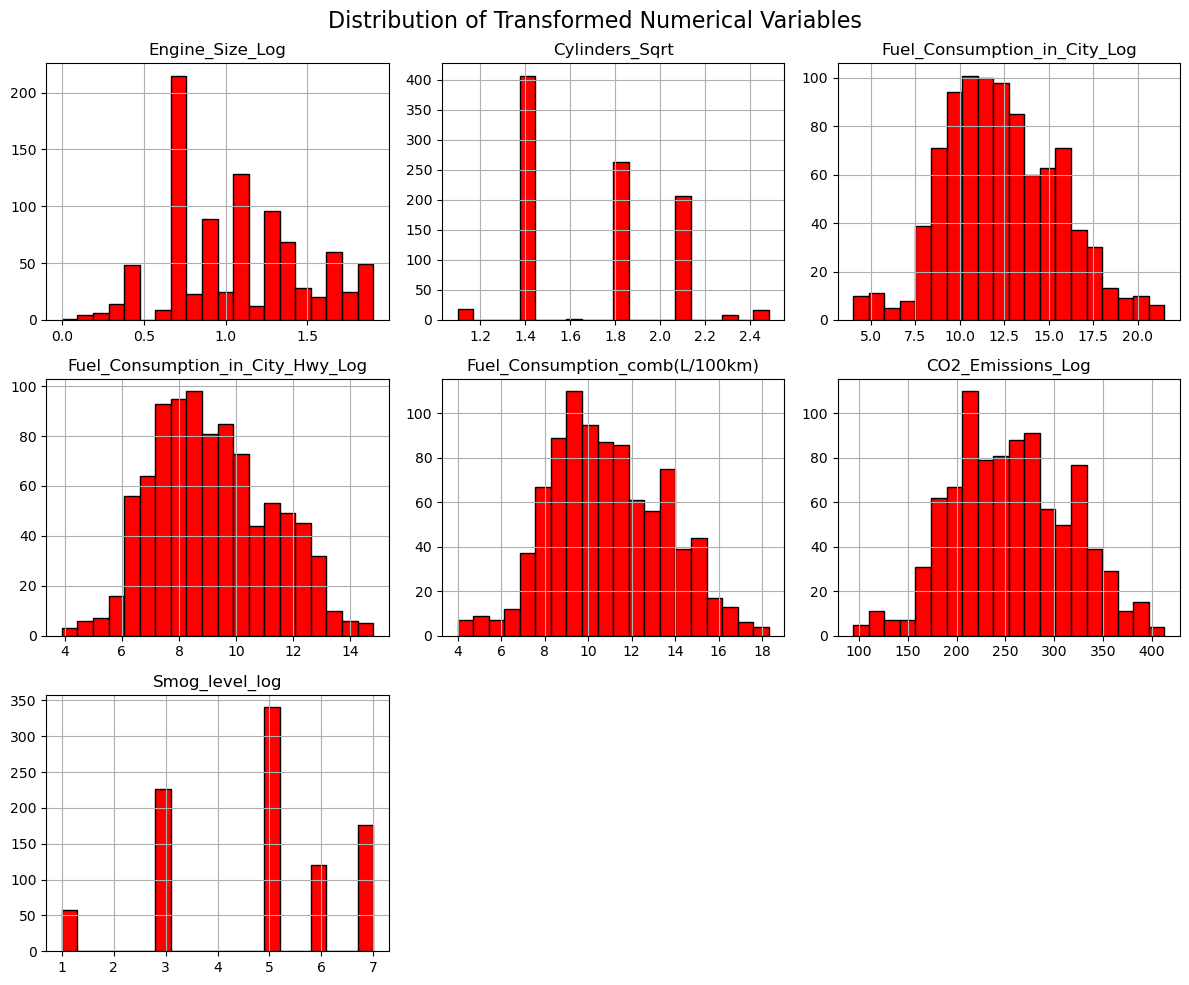

In [25]:
num_transformed = pd.DataFrame()

num_transformed['Engine_Size_Log'] = np.log(num['Engine_Size'])
num_transformed['Cylinders_Sqrt'] = np.log(num['Cylinders'])
num_transformed['Fuel_Consumption_in_City_Log'] = num['Fuel_Consumption_in_City(L/100 km)']
num_transformed['Fuel_Consumption_in_City_Hwy_Log'] = num['Fuel_Consumption_in_City_Hwy(L/100 km)']
num_transformed['Fuel_Consumption_comb(L/100km)'] = num['Fuel_Consumption_comb(L/100km)']
num_transformed['CO2_Emissions_Log'] = num['CO2_Emissions']
num_transformed['Smog_level_log'] = num['Smog_Level']

num_transformed.hist(figsize=(12, 10), bins=20, color='red', edgecolor='black')
plt.suptitle('Distribution of Transformed Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
num_transformed.skew()

Engine_Size_Log                     0.198775
Cylinders_Sqrt                      0.357226
Fuel_Consumption_in_City_Log        0.211605
Fuel_Consumption_in_City_Hwy_Log    0.286242
Fuel_Consumption_comb(L/100km)      0.189060
CO2_Emissions_Log                   0.095462
Smog_level_log                     -0.493896
dtype: float64

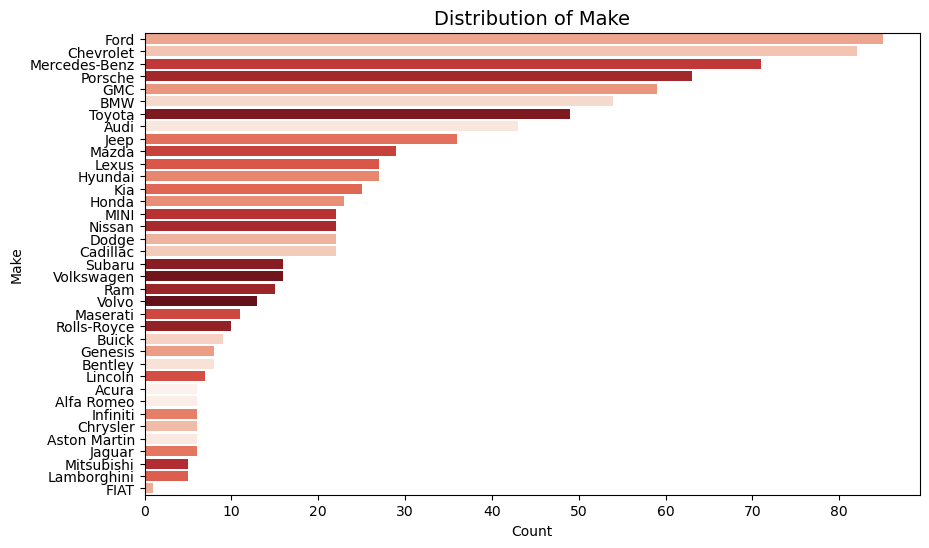

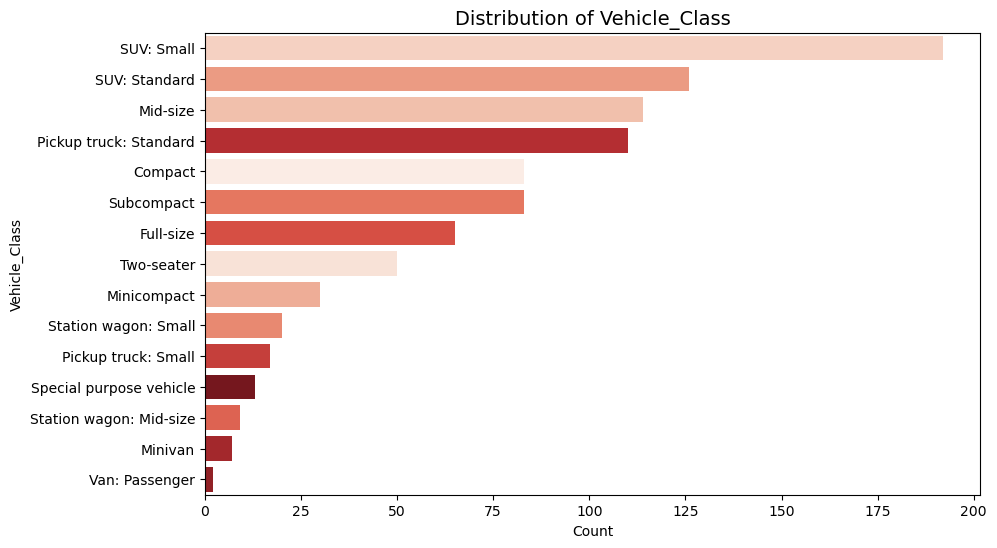

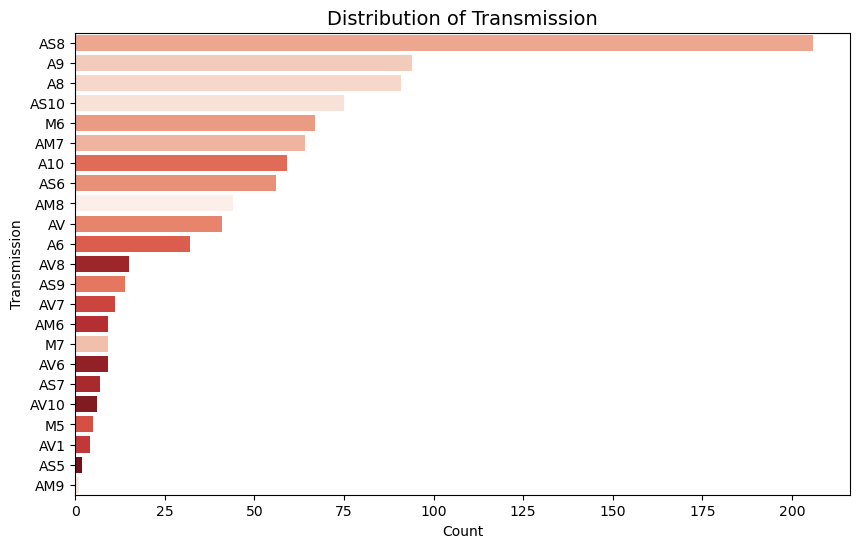

In [27]:
import seaborn as sns
cat1 = [col for col in df1.select_dtypes(include='object').columns if col != 'Model']
for column in cat1:
    plt.figure(figsize=(10, 6))
    import seaborn as sns
    sns.countplot(data=df1, y=column, order=df1[column].value_counts().index, hue=column, palette="Reds", legend=False)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

#### Data Visualization for Target Variable

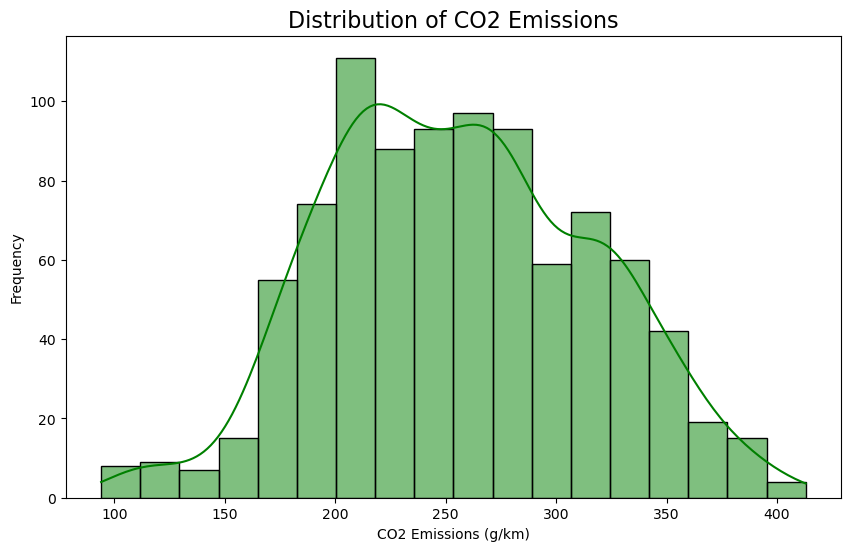

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=num, x='CO2_Emissions', kde=True, color='green')
plt.title('Distribution of CO2 Emissions', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

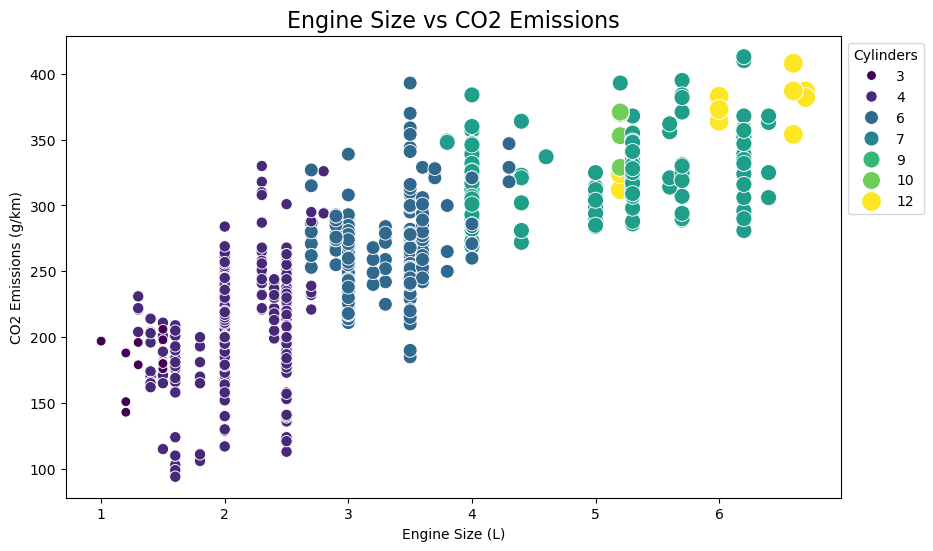

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Engine_Size', y='CO2_Emissions', hue='Cylinders', palette='viridis', size='Cylinders', sizes=(50, 200))
plt.title('Engine Size vs CO2 Emissions', fontsize=16)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend(title='Cylinders', bbox_to_anchor=(1, 1))
plt.show()

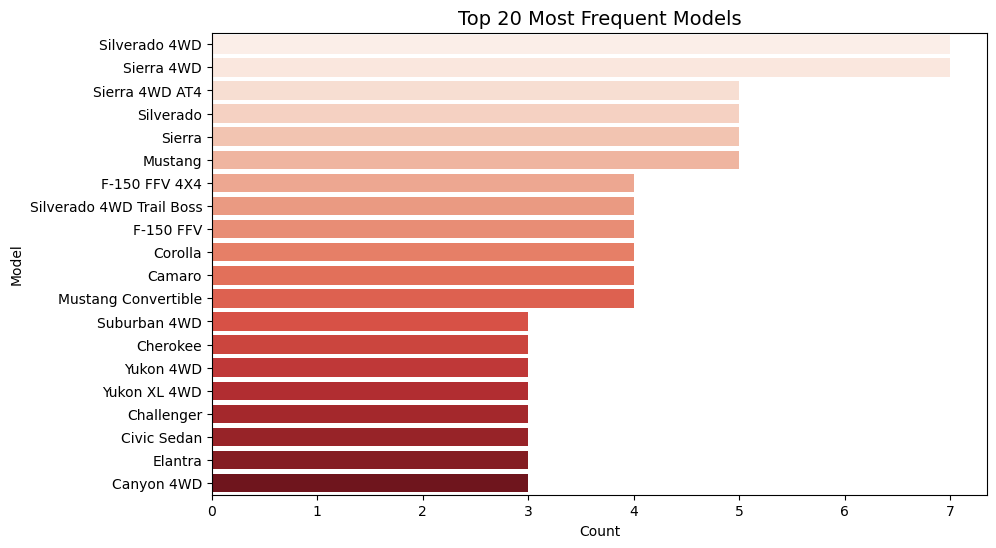

In [31]:
top_n=20
top_models = df1['Model'].value_counts().head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_models.values, y=top_models.index, hue=top_models.index, palette="Reds", legend=False)
plt.title("Top 20 Most Frequent Models", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()

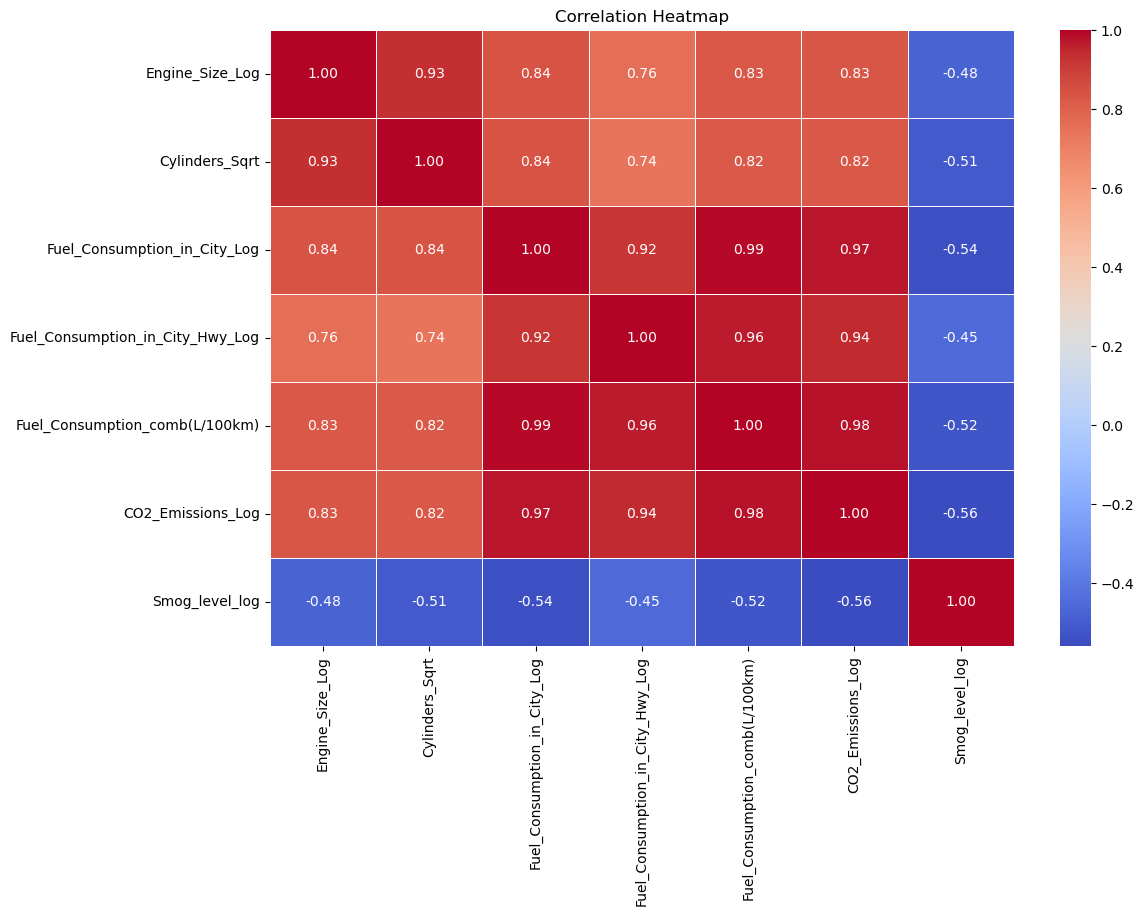

In [32]:
plt.figure(figsize=(12,8))
corr = num_transformed.corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
for col in cat:
    print(f"Value counts for '{col}': ")
    print(cat[col].value_counts())
    print('\n'+"-"*40+'\n')

Value counts for 'Make': 
Make
Ford             85
Chevrolet        82
Mercedes-Benz    71
Porsche          63
GMC              59
BMW              54
Toyota           49
Audi             43
Jeep             36
Mazda            29
Lexus            27
Hyundai          27
Kia              25
Honda            23
MINI             22
Nissan           22
Dodge            22
Cadillac         22
Subaru           16
Volkswagen       16
Ram              15
Volvo            13
Maserati         11
Rolls-Royce      10
Buick             9
Genesis           8
Bentley           8
Lincoln           7
Acura             6
Alfa Romeo        6
Infiniti          6
Chrysler          6
Aston Martin      6
Jaguar            6
Mitsubishi        5
Lamborghini       5
FIAT              1
Name: count, dtype: int64

----------------------------------------

Value counts for 'Model': 
Model
Silverado 4WD                   7
Sierra 4WD                      7
Sierra 4WD AT4                  5
Silverado                

In [34]:
df.describe(include='object')

,Make,Model,Vehicle_Class,Transmission
count,935,935,935,935
unique,38,703,15,23
top,Ford,Silverado 4WD,SUV: Small,AS8
freq,87,7,192,206


We can see that there are too many categories in the categorical columns. Lets reduce it

In [36]:
cat

,Make,Model,Vehicle_Class,Transmission
0,Acura,ILX,Compact,AM8
1,Acura,NSX,Two-seater,AM9
2,Acura,RDX SH-AWD,SUV: Small,AS10
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,AS10
4,Acura,TLX SH-AWD,Compact,AS10
...,...,...,...,...
930,Volvo,XC40 T5 AWD,SUV: Small,AS8
931,Volvo,XC60 T5 AWD,SUV: Small,AS8
932,Volvo,XC60 T6 AWD,SUV: Small,AS8
933,Volvo,XC90 T5 AWD,SUV: Standard,AS8


In [37]:
top_n = 20
top_models = cat['Model'].value_counts().head(top_n).index

# Replace rare models with "Other"
cat['Model_Grouped'] = cat['Model'].apply(lambda x: x if x in top_models else 'Other')

# Check new categories
print(cat['Model_Grouped'].value_counts())

Model_Grouped
Other                       839
Silverado 4WD                 7
Sierra 4WD                    7
Mustang                       5
Silverado                     5
Sierra 4WD AT4                5
Sierra                        5
Camaro                        4
Mustang Convertible           4
F-150 FFV 4X4                 4
F-150 FFV                     4
Silverado 4WD Trail Boss      4
Corolla                       4
Canyon 4WD                    3
Challenger                    3
Suburban 4WD                  3
Yukon 4WD                     3
Yukon XL 4WD                  3
Civic Sedan                   3
Elantra                       3
Cherokee                      3
Name: count, dtype: int64


In [38]:
top_n1 = 20
top_models1 = cat['Make'].value_counts().head(top_n1).index

# Replace rare models with "Other"
cat['Make_Grouped'] = cat['Make'].apply(lambda x: x if x in top_models1 else 'Other')

# Check new categories
print(cat['Make_Grouped'].value_counts())

Make_Grouped
Other            128
Ford              85
Chevrolet         82
Mercedes-Benz     71
Porsche           63
GMC               59
BMW               54
Toyota            49
Audi              43
Jeep              36
Mazda             29
Hyundai           27
Lexus             27
Kia               25
Honda             23
MINI              22
Nissan            22
Dodge             22
Cadillac          22
Subaru            16
Volkswagen        16
Name: count, dtype: int64


In [39]:
cat = cat.drop(columns=['Make', 'Model'])
cat

,Vehicle_Class,Transmission,Model_Grouped,Make_Grouped
0,Compact,AM8,Other,Other
1,Two-seater,AM9,Other,Other
2,SUV: Small,AS10,Other,Other
3,SUV: Small,AS10,Other,Other
4,Compact,AS10,Other,Other
...,...,...,...,...
930,SUV: Small,AS8,Other,Other
931,SUV: Small,AS8,Other,Other
932,SUV: Small,AS8,Other,Other
933,SUV: Standard,AS8,Other,Other


#### Lets encode the categorical columns

In [41]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['Vehicle_Class', 'Transmission', 'Model_Grouped', 'Make_Grouped']

# Create a dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()  # Initialize a LabelEncoder
    cat[col] = le.fit_transform(cat[col])  # Apply Label Encoding
    label_encoders[col] = le  # Store the encoder for future use

# Check the encoded dataset
print(cat.head())

# Display the mapping of original categories to encoded values for each column
for col, le in label_encoders.items():
    print(f"\nLabel Encoding for '{col}':")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

   Vehicle_Class  Transmission  Model_Grouped  Make_Grouped
0              0             6             11            16
1             13             7             11            16
2              7             8             11            16
3              7             8             11            16
4              0             8             11            16

Label Encoding for 'Vehicle_Class':
{'Compact': 0, 'Full-size': 1, 'Mid-size': 2, 'Minicompact': 3, 'Minivan': 4, 'Pickup truck: Small': 5, 'Pickup truck: Standard': 6, 'SUV: Small': 7, 'SUV: Standard': 8, 'Special purpose vehicle': 9, 'Station wagon: Mid-size': 10, 'Station wagon: Small': 11, 'Subcompact': 12, 'Two-seater': 13, 'Van: Passenger': 14}

Label Encoding for 'Transmission':
{'A10': 0, 'A6': 1, 'A8': 2, 'A9': 3, 'AM6': 4, 'AM7': 5, 'AM8': 6, 'AM9': 7, 'AS10': 8, 'AS5': 9, 'AS6': 10, 'AS7': 11, 'AS8': 12, 'AS9': 13, 'AV': 14, 'AV1': 15, 'AV10': 16, 'AV6': 17, 'AV7': 18, 'AV8': 19, 'M5': 20, 'M6': 21, 'M7': 22}

Label Enco

In [42]:
cat

,Vehicle_Class,Transmission,Model_Grouped,Make_Grouped
0,0,6,11,16
1,13,7,11,16
2,7,8,11,16
3,7,8,11,16
4,0,8,11,16
...,...,...,...,...
930,7,12,11,16
931,7,12,11,16
932,7,12,11,16
933,8,12,11,16


In [43]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 934
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Vehicle_Class  921 non-null    int32
 1   Transmission   921 non-null    int32
 2   Model_Grouped  921 non-null    int32
 3   Make_Grouped   921 non-null    int32
dtypes: int32(4)
memory usage: 21.6 KB


In [44]:
new_df = pd.concat([num_transformed,cat],axis=1)

In [45]:
new_df

,Engine_Size_Log,Cylinders_Sqrt,Fuel_Consumption_in_City_Log,Fuel_Consumption_in_City_Hwy_Log,Fuel_Consumption_comb(L/100km),CO2_Emissions_Log,Smog_level_log,Vehicle_Class,Transmission,Model_Grouped,Make_Grouped
0,0.875469,1.386294,9.9,7.0,8.6,199,3,0,6,11,16
1,1.252763,1.791759,11.1,10.8,11.0,256,3,13,7,11,16
2,0.693147,1.386294,11.0,8.6,9.9,232,6,7,8,11,16
3,0.693147,1.386294,11.3,9.1,10.3,242,6,7,8,11,16
4,0.693147,1.386294,11.2,8.0,9.8,230,7,0,8,11,16
...,...,...,...,...,...,...,...,...,...,...,...
930,0.693147,1.386294,10.7,7.7,9.4,219,5,7,12,11,16
931,0.693147,1.386294,11.1,8.3,9.9,230,5,7,12,11,16
932,0.693147,1.386294,11.7,8.6,10.3,240,7,7,12,11,16
933,0.693147,1.386294,11.5,8.4,10.1,236,5,8,12,11,16


In [46]:
new_df.isnull().sum()

Engine_Size_Log                     0
Cylinders_Sqrt                      0
Fuel_Consumption_in_City_Log        0
Fuel_Consumption_in_City_Hwy_Log    0
Fuel_Consumption_comb(L/100km)      0
CO2_Emissions_Log                   0
Smog_level_log                      0
Vehicle_Class                       0
Transmission                        0
Model_Grouped                       0
Make_Grouped                        0
dtype: int64

## Model Building

In [48]:
from sklearn.model_selection import train_test_split

x = new_df.drop(columns=['CO2_Emissions_Log'])
y = new_df['CO2_Emissions_Log']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Train set shape: (736, 10)
Test set shape: (185, 10)


In [51]:
!pip install xgboost

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [53]:
#Default hyperparameters
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

In [54]:
# Fit the models
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [57]:
# Lets Predict for train and test datasets
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

y_train_pred_xgb = xgb_model.predict(x_train)
y_test_pred_xgb = xgb_model.predict(x_test)

In [58]:
# Lets do Evaluation for Decision Tree
print("Decision Tree Regressor:")
print(f"  Train R² Score: {r2_score(y_train, y_train_pred_dt):.3f}")
print(f"  Train RMSE: {root_mean_squared_error(y_train, y_train_pred_dt):.3f}")
print(f"  Test R² Score: {r2_score(y_test, y_test_pred_dt):.3f}")
print(f"  Test RMSE: {root_mean_squared_error(y_test, y_test_pred_dt):.3f}")

# Lets do Evaluation for Random Forest
print("\nRandom Forest Regressor:")
print(f"  Train R² Score: {r2_score(y_train, y_train_pred_rf):.3f}")
print(f"  Train RMSE: {root_mean_squared_error(y_train, y_train_pred_rf):.3f}")
print(f"  Test R² Score: {r2_score(y_test, y_test_pred_rf):.3f}")
print(f"  Test RMSE: {root_mean_squared_error(y_test, y_test_pred_rf):.3f}")

# Lets do Evaluation for XGBoost
print("\nXGBoost Regressor:")
print(f"  Train R² Score: {r2_score(y_train, y_train_pred_xgb):.3f}")
print(f"  Train RMSE: {root_mean_squared_error(y_train, y_train_pred_xgb):.3f}")
print(f"  Test R² Score: {r2_score(y_test, y_test_pred_xgb):.3f}")
print(f"  Test RMSE: {root_mean_squared_error(y_test, y_test_pred_xgb):.3f}")

Decision Tree Regressor:
  Train R² Score: 1.000
  Train RMSE: 0.030
  Test R² Score: 0.974
  Test RMSE: 9.185

Random Forest Regressor:
  Train R² Score: 0.996
  Train RMSE: 3.622
  Test R² Score: 0.984
  Test RMSE: 7.143

XGBoost Regressor:
  Train R² Score: 1.000
  Train RMSE: 0.230
  Test R² Score: 0.993
  Test RMSE: 4.946


XGBoost Regressor is the best-performing model for your dataset based on:

So we will go ahead with XGBoost Regressor

#### Lets do hyperparameter tunning on XGBoost Model

In [61]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1  # Use all available cores
)

grid_search.fit(x_train, y_train)

# Lets chack the best hyperparameters and model performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(x_test)

print("\nTest R² Score:", r2_score(y_test, y_pred_xgb_tuned))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred_xgb_tuned))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation R² Score: 0.9894238233566284

Test R² Score: 0.9850966334342957
Test RMSE: 6.998243629202872


C:\Users\Dell\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Let's see the feature importance

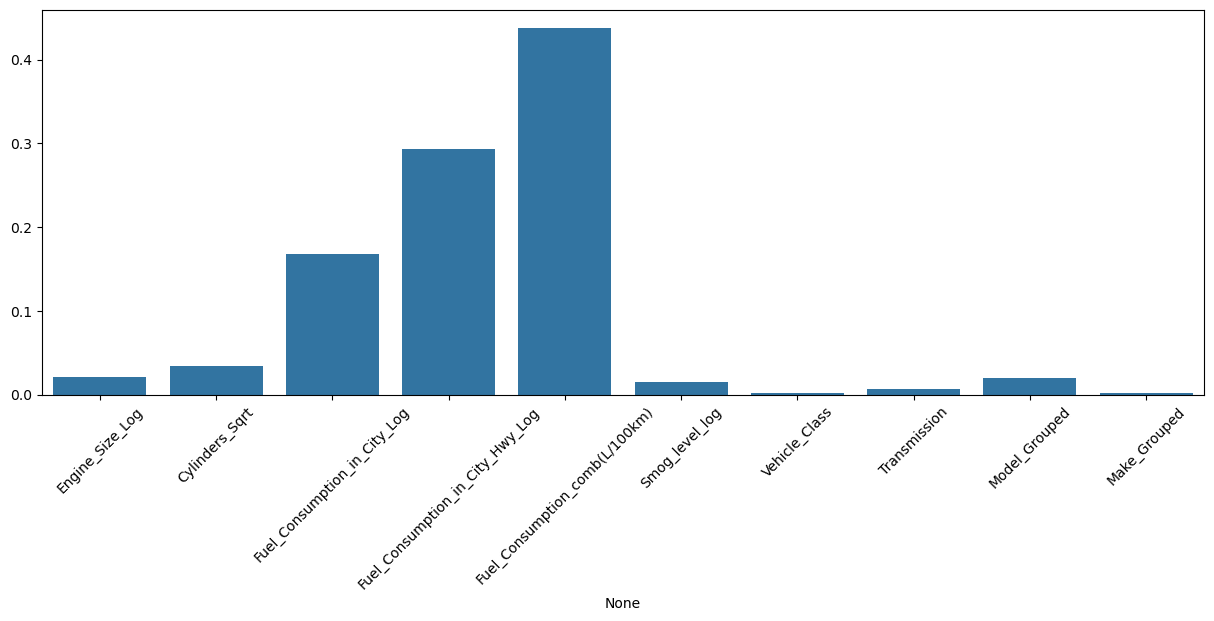

In [63]:
plt.figure( figsize = (15,5))
sns.barplot(x = x_train.columns , y = best_xgb.feature_importances_ )
plt.xticks(rotation = 45)
plt.show()

#### Building the pickle file for deploymnet

In [115]:
import pickle

In [117]:
filename = 'trained_model.sav'
pickle.dump(best_xgb,open(filename,'wb'))

In [119]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))